In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline


/home/albert/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [17]:
case='MAA4002'
year='2011-2013'

gridfile='/mnt/albert/equipes/IGE/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75-MAA4001_mesh_mask.nc'

dirmean='/mnt/albert/equipes/IGE/meom/workdir/albert/NACHOS12.L75/NACHOS12.L75-'+case+'-MEAN/'+year+'/'

title="NACHOS12.L75-"+case+" "+year

fileflxT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_flxT.nc'
fileT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_gridT.nc'
fileEKE=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_EKE.nc'
fileMXL03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_MXL.nc'
fileMXL09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_MXL.nc'
filePSI=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_PSI.nc'

dsgrid=xr.open_dataset(gridfile)
lat=dsgrid.nav_lat
lon=dsgrid.nav_lon
masksurf=dsgrid.tmaskutil[0]
mask=dsgrid.tmask[0]

dsT=xr.open_dataset(fileT)
tem=dsT.votemper[0]
sal=dsT.vosaline[0]
ssh=dsT.sossheig[0]
tem_ma=np.ma.array(tem,mask=1-mask)
sal_ma=np.ma.array(sal,mask=1-mask)
ssh_ma=np.ma.array(ssh,mask=1-masksurf)

dsMXL03=xr.open_dataset(fileMXL03)
mxl03_rho010=dsMXL03.somxl010[0]
mxl03_rho030=dsMXL03.somxl030[0]
mxl03_t02=dsMXL03.somxlt02[0]
dsMXL09=xr.open_dataset(fileMXL09)
mxl09_rho010=dsMXL09.somxl010[0]
mxl09_rho030=dsMXL09.somxl030[0]
mxl09_t02=dsMXL09.somxlt02[0]
mxl03_rho010_ma=np.ma.array(mxl03_rho010,mask=1-masksurf)
mxl03_rho030_ma=np.ma.array(mxl03_rho030,mask=1-masksurf)
mxl03_t02_ma=np.ma.array(mxl03_t02,mask=1-masksurf)
mxl09_rho010_ma=np.ma.array(mxl09_rho010,mask=1-masksurf)
mxl09_rho030_ma=np.ma.array(mxl09_rho030,mask=1-masksurf)
mxl09_t02_ma=np.ma.array(mxl09_t02,mask=1-masksurf)


dsEKE=xr.open_dataset(fileEKE)
eke=dsEKE.voeke[0,0]
eke_ma=np.ma.array(eke,mask=1-masksurf)

dsPSI=xr.open_dataset(filePSI)
psi=dsPSI.sobarstf[0]
psi_ma=np.ma.array(psi,mask=1-masksurf)

dsflxT=xr.open_dataset(fileflxT)
Heat=dsflxT.sohefldo[0]
WaterFlx=dsflxT.sowaflup[0]
WaterDmp=dsflxT.sowafld[0]
Heat_ma=np.ma.array(Heat,mask=1-masksurf)
WaterFlx_ma=np.ma.array(WaterFlx,mask=1-masksurf)
WaterDmp_ma=np.ma.array(WaterDmp,mask=1-masksurf)



In [14]:
def plot_glob(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
        cmap = plt.get_cmap(pal)
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.set_global()
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label=unit)
        cbar.ax.tick_params(labelsize=20)
        ax.set_title(name,size=17)

def plot_atl(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        cmap = plt.get_cmap(pal)
        ax.set_extent([-100, 50, 0, 70])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)
  

def plot_atl_cont(fig,sub,var,unit,name,vmin,vmax):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        ax.set_extent([-100, 50, 0, 70])
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap='Blues',vmin=vmin,vmax=vmax)
        pcont=ax.contour(lon,lat,ma.masked_invalid(var),10,colors='k',transform=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND,facecolor='black')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)

        ax.set_title(name+' '+unit,size=17,y=1.08)

def plot_natl(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        ax.set_extent([-100, 50, 50, 70])
        cmap = plt.get_cmap(pal)
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110])
        gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False
        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
        ax.set_title(name+' '+unit,size=17,y=1.09)


Text(0.5,0.98,'NACHOS12.L75-MAA4002 2011-2013')

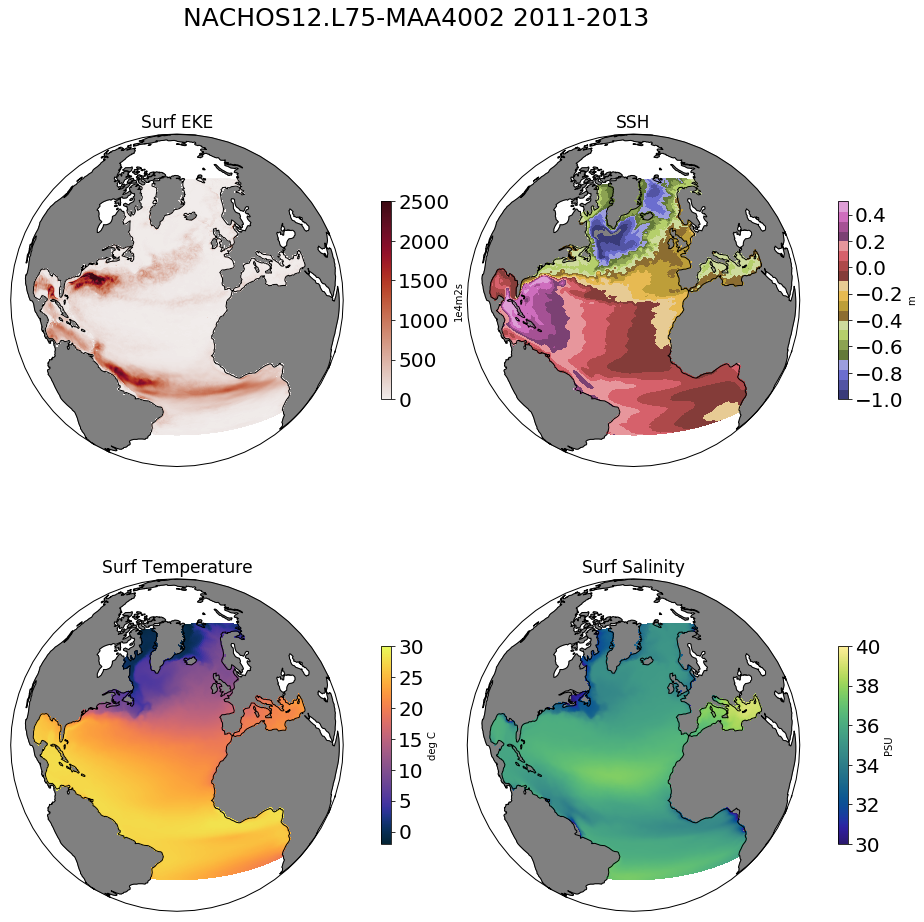

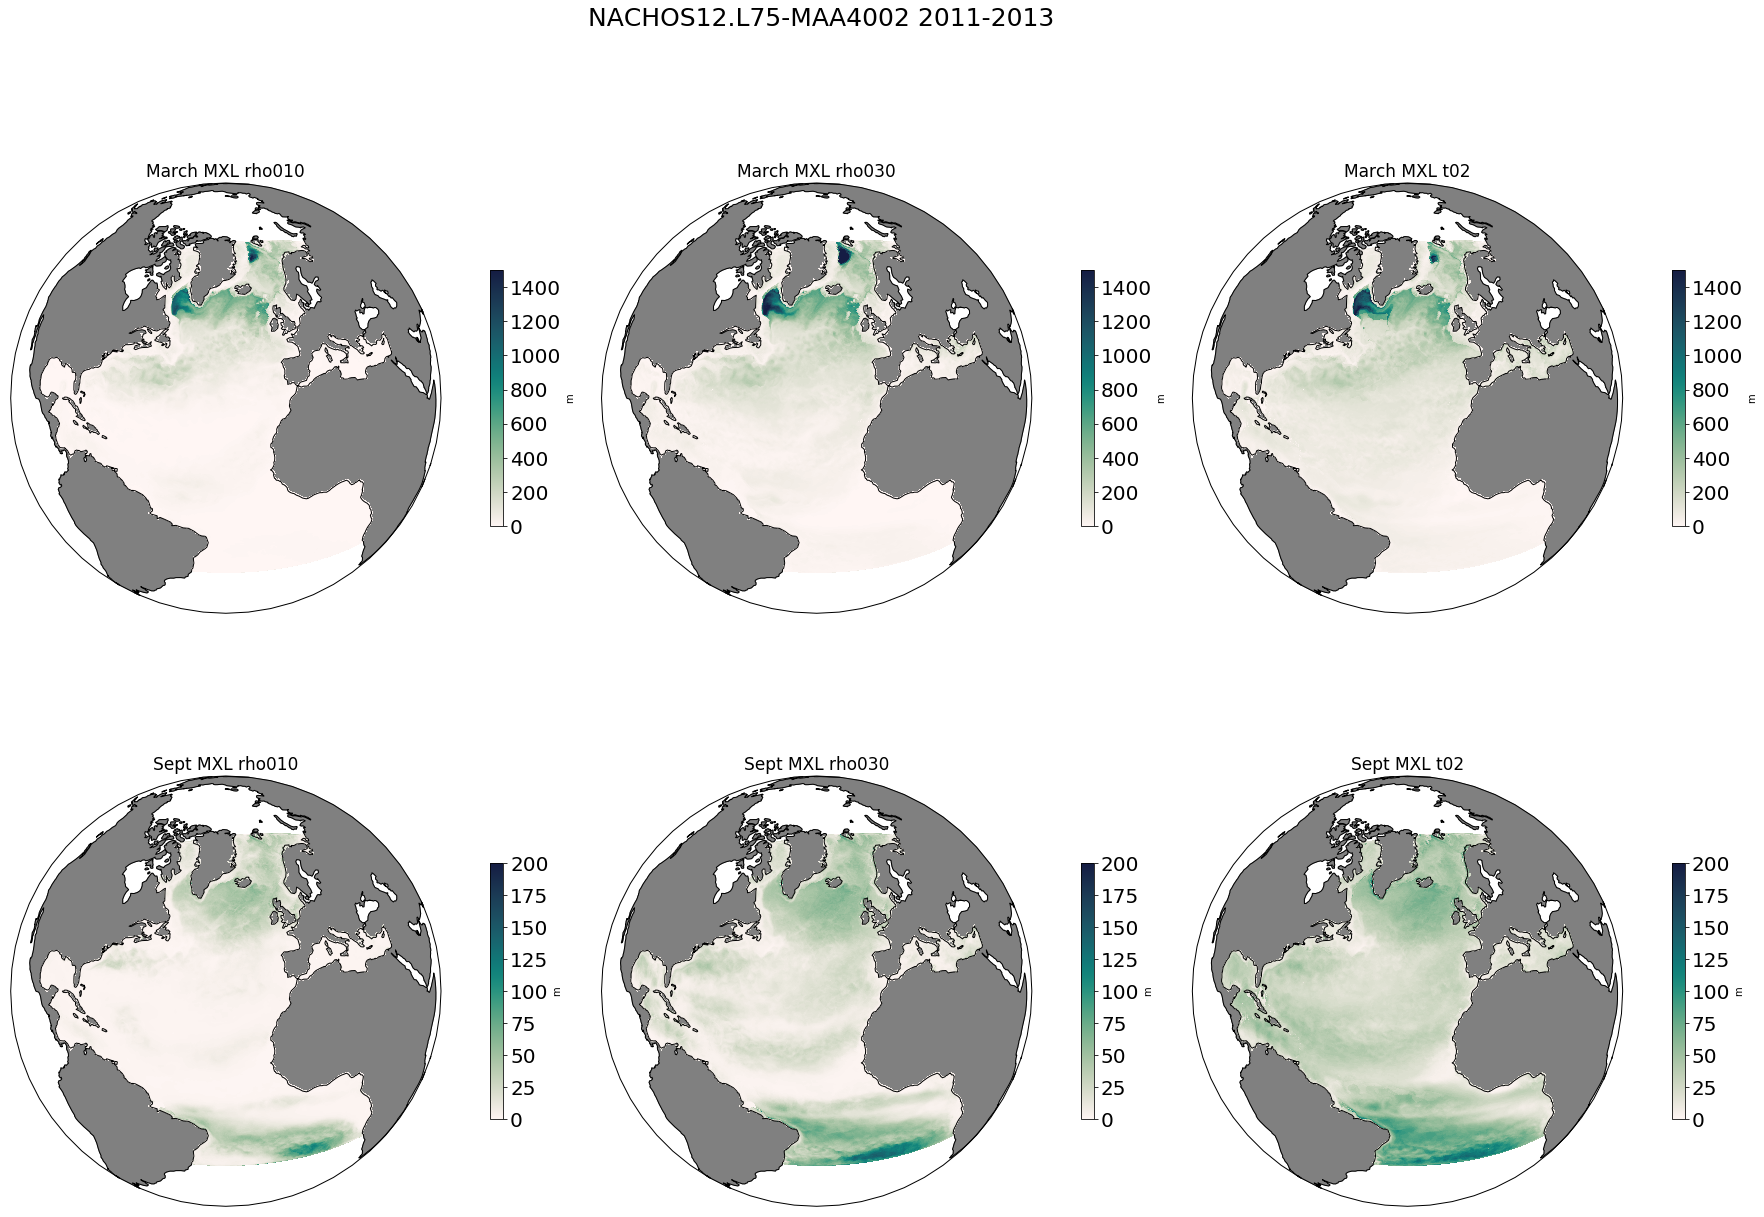

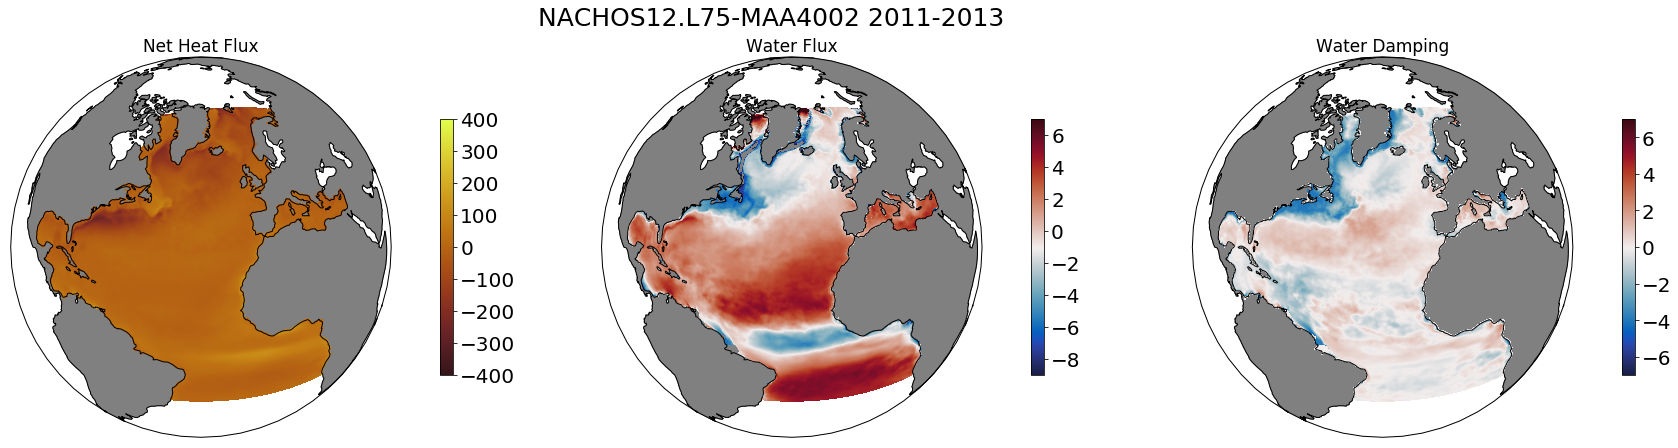

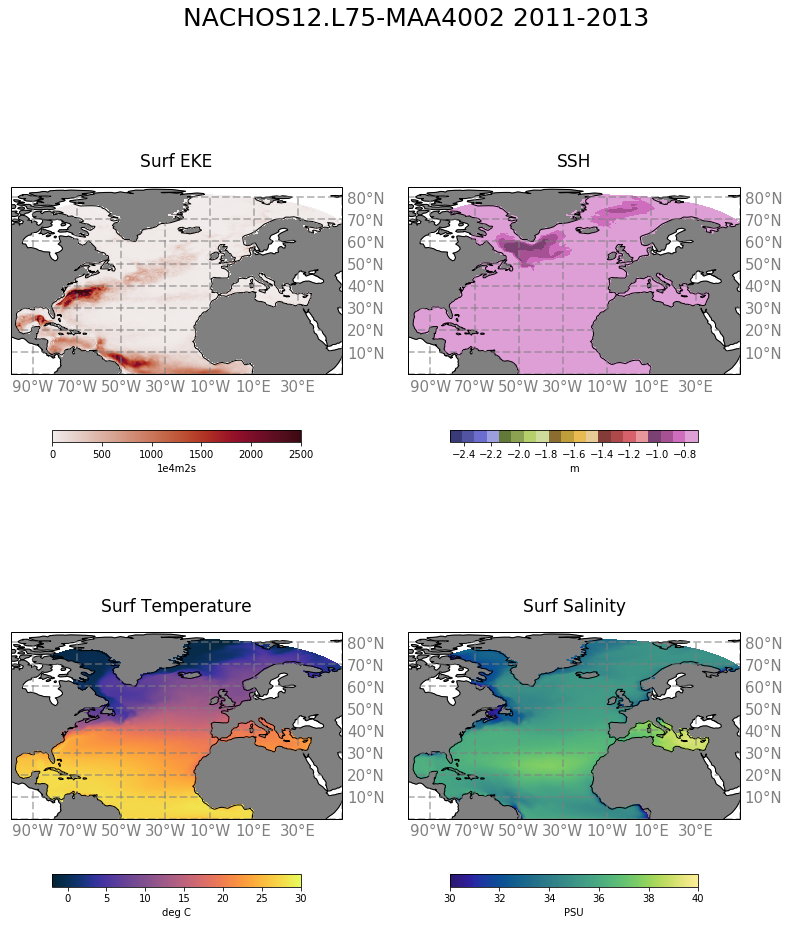

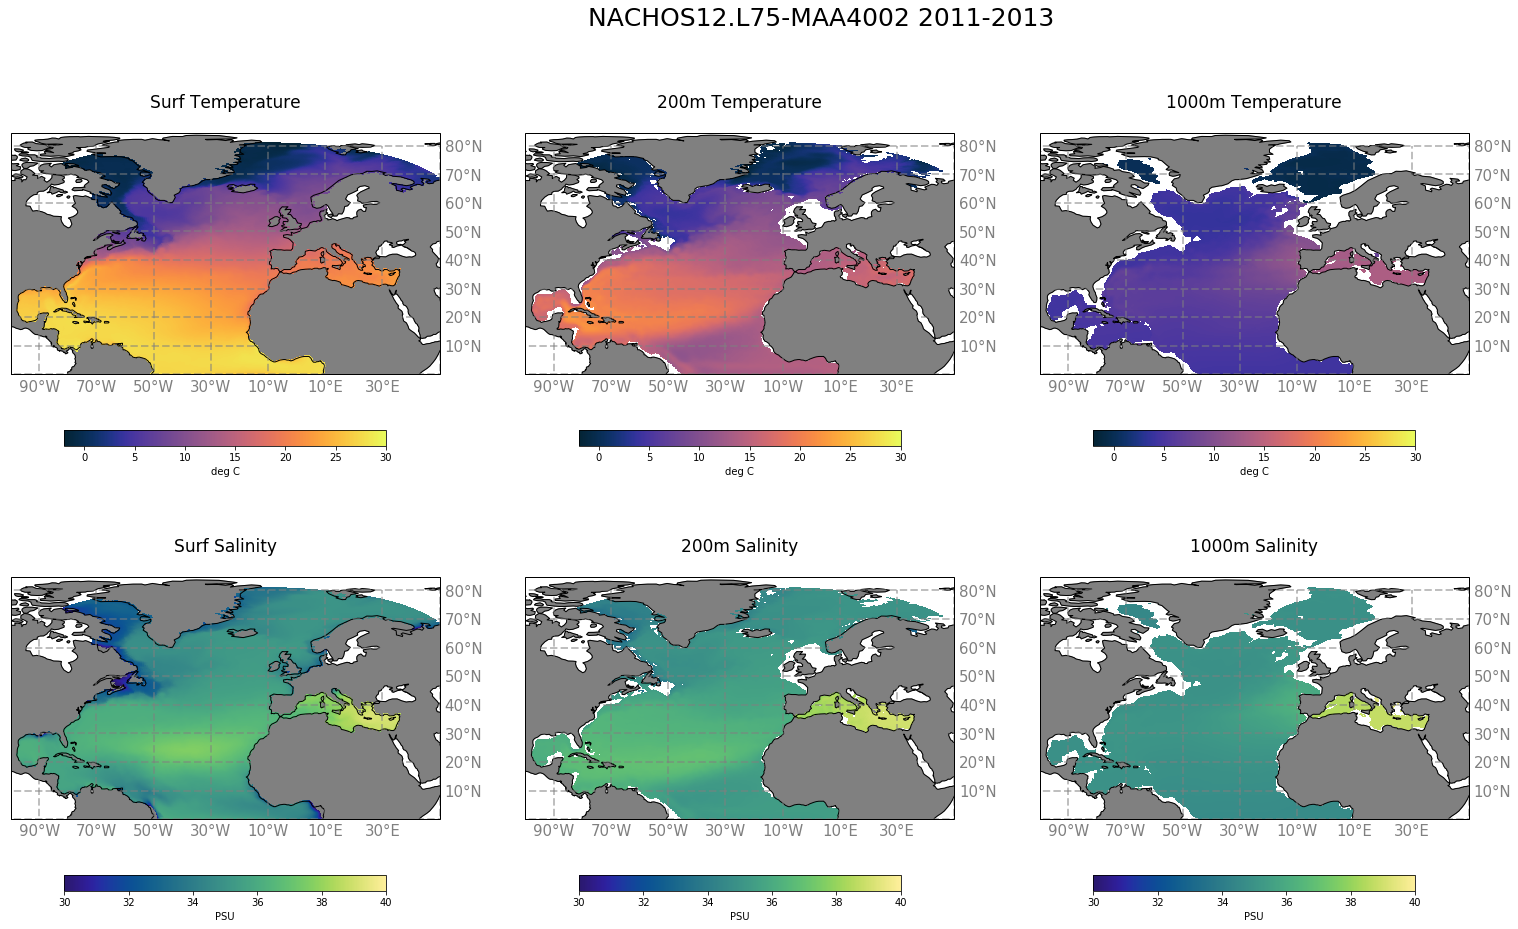

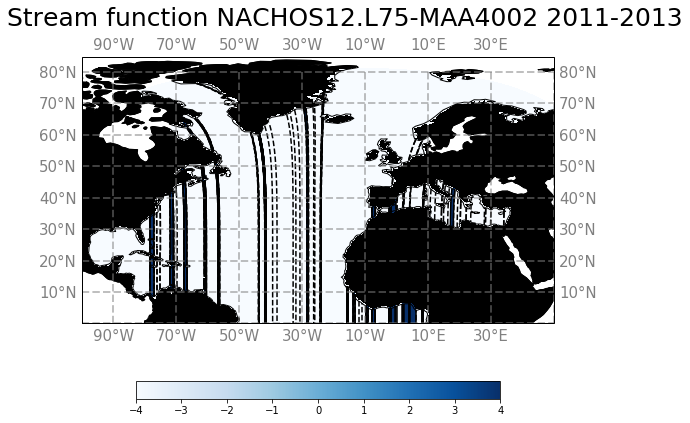

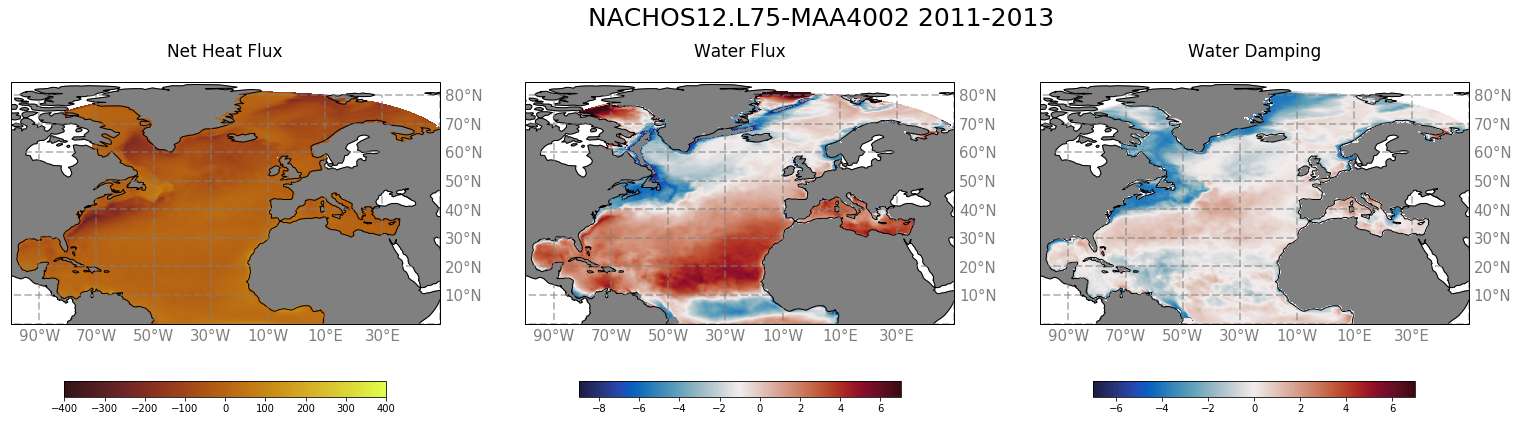

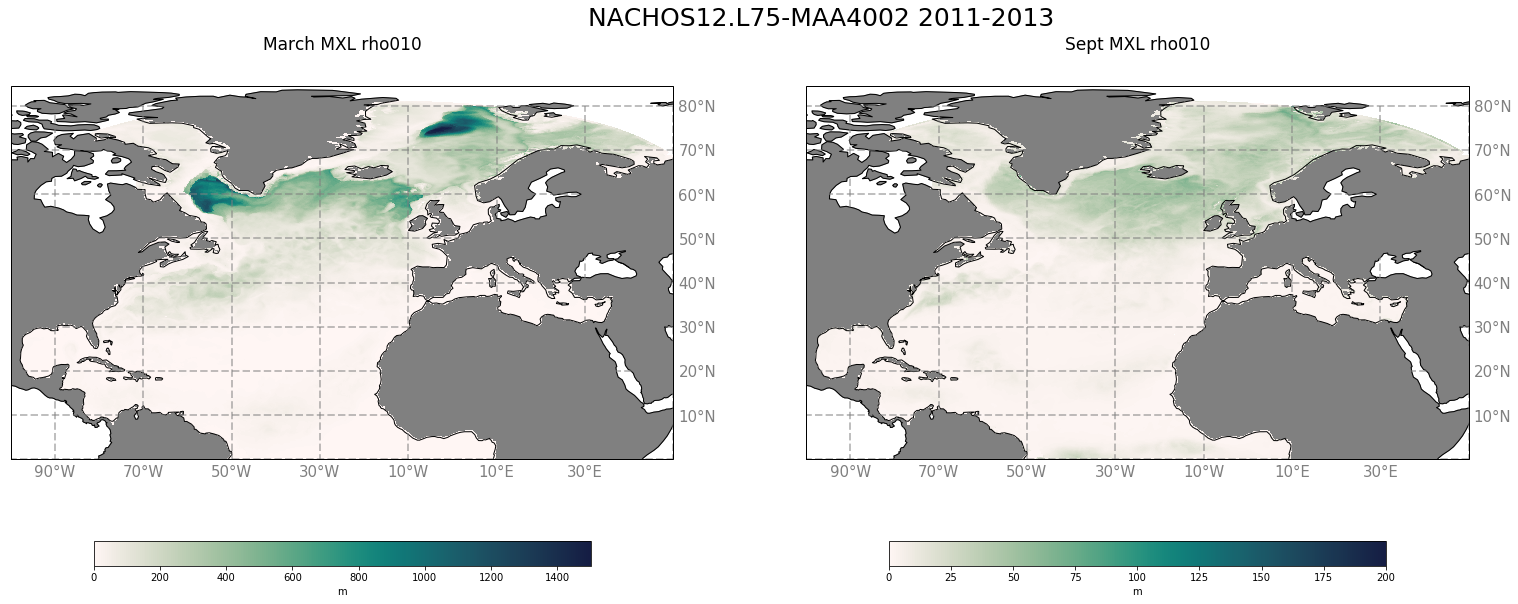

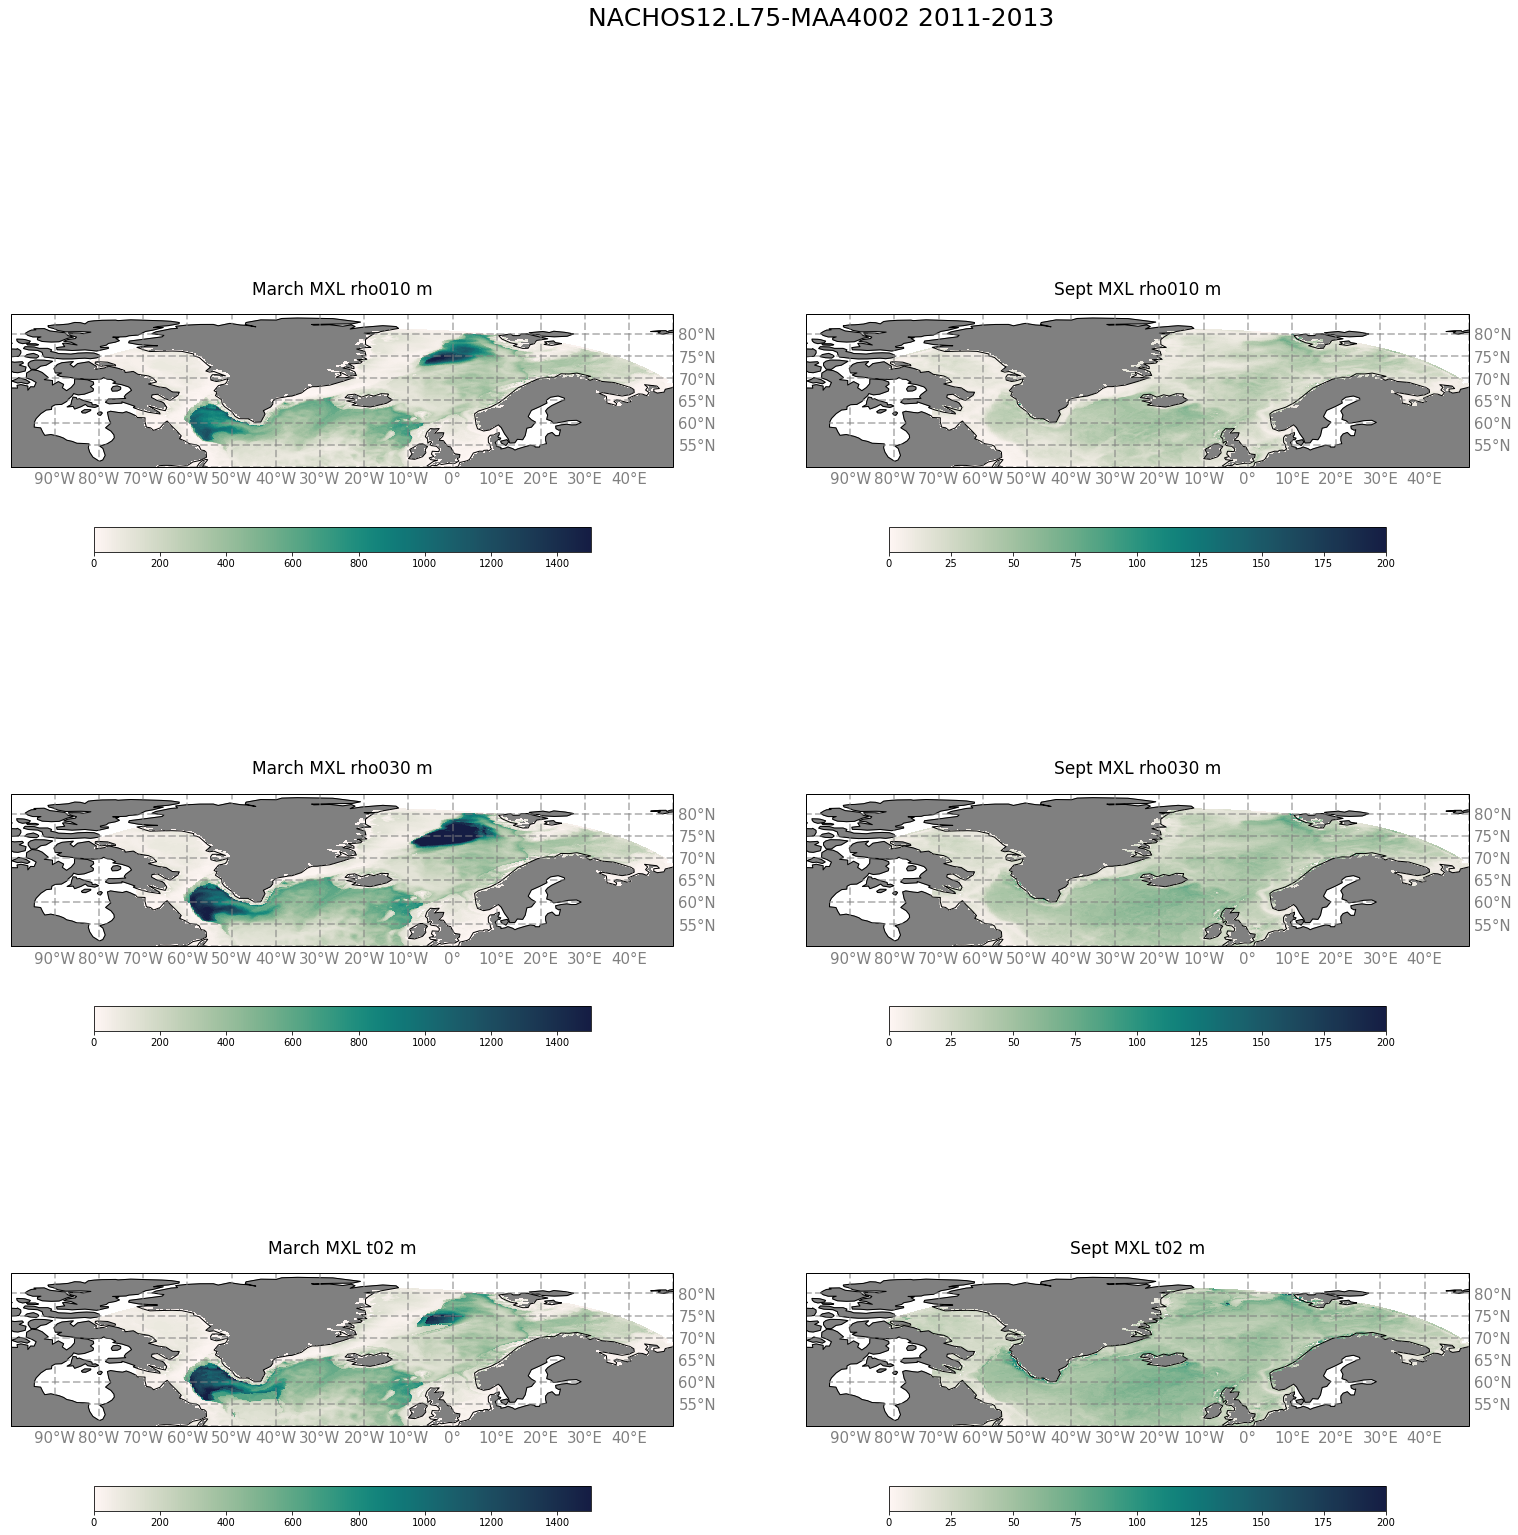

In [19]:
# Tous les plots

# Tous les plots glob

# Eke, SSH,T et S

fig = plt.figure(figsize=(15,15))
plot_glob(fig,221,10000*eke_ma,0,2500,'1e4m2s','Surf EKE',cmocean.cm.amp)
plot_glob(fig,222,ssh_ma,-1,0.5,'m','SSH','tab20b')
plot_glob(fig,223,tem_ma[0],-2,30,'deg C','Surf Temperature',cmocean.cm.thermal)
plot_glob(fig,224,sal_ma[0],30,40,'PSU','Surf Salinity',cmocean.cm.haline)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)

#MXL
fig = plt.figure(figsize=(30,20))
plot_glob(fig,231,mxl03_rho010_ma,0,1500,'m','March MXL rho010',cmocean.cm.tempo)
plot_glob(fig,234,mxl09_rho010_ma,0,200,'m','Sept MXL rho010',cmocean.cm.tempo)
plot_glob(fig,232,mxl03_rho030_ma,0,1500,'m','March MXL rho030',cmocean.cm.tempo)
plot_glob(fig,235,mxl09_rho030_ma,0,200,'m','Sept MXL rho030',cmocean.cm.tempo)
plot_glob(fig,233,mxl03_t02_ma,0,1500,'m','March MXL t02',cmocean.cm.tempo)
plot_glob(fig,236,mxl09_t02_ma,0,200,'m','Sept MXL t02',cmocean.cm.tempo)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)

#flx
fig = plt.figure(figsize=(30,7))
plot_glob(fig,131,Heat_ma,-400,400,'','Net Heat Flux',cmocean.cm.solar)
plot_glob(fig,132,86400*WaterFlx_ma,-9,7,'','Water Flux',cmocean.cm.balance)
plot_glob(fig,133,86400*WaterDmp_ma,-7,7,'','Water Damping',cmocean.cm.balance)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)


# Tous les plots Atlantique
# T & S

fig = plt.figure(figsize=(15,15))
plot_atl(fig,221,10000*eke_ma,0,2500,'1e4m2s','Surf EKE',cmocean.cm.amp)
plot_atl(fig,222,ssh_ma,-2.5,-0.7,'m','SSH','tab20b') 
plot_atl(fig,223,tem_ma[0],-2,30,'deg C','Surf Temperature',cmocean.cm.thermal)
plot_atl(fig,224,sal_ma[0],30,40,'PSU','Surf Salinity',cmocean.cm.haline)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(30,15))
plot_atl(fig,231,tem_ma[0],-2,30,'deg C','Surf Temperature',cmocean.cm.thermal)
plot_atl(fig,234,sal_ma[0],30,40,'PSU','Surf Salinity',cmocean.cm.haline)
plot_atl(fig,232,tem_ma[30],-2,30,'deg C','200m Temperature',cmocean.cm.thermal)
plot_atl(fig,235,sal_ma[30],30,40,'PSU','200m Salinity',cmocean.cm.haline)
plot_atl(fig,233,tem_ma[46],-2,30,'deg C','1000m Temperature',cmocean.cm.thermal)
plot_atl(fig,236,sal_ma[46],30,40,'PSU','1000m Salinity',cmocean.cm.haline)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)

#PSI
fig = plt.figure(figsize=(10,7))
plot_atl_cont(fig,111,1e-7*psi_ma,'','',-4,4)
fig.suptitle('Stream function NACHOS12.L75-'+case+' '+year, fontsize=25)

#flx
fig = plt.figure(figsize=(30,7))
plot_atl(fig,131,Heat_ma,-400,400,'','Net Heat Flux',cmocean.cm.solar)
plot_atl(fig,132,86400*WaterFlx_ma,-9,7,'','Water Flux',cmocean.cm.balance)
plot_atl(fig,133,86400*WaterDmp_ma,-7,7,'','Water Damping',cmocean.cm.balance)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)

#MXL
fig = plt.figure(figsize=(30,10))
plot_atl(fig,121,mxl03_rho010_ma,0,1500,'m','March MXL rho010',cmocean.cm.tempo)
plot_atl(fig,122,mxl09_rho010_ma,0,200,'m','Sept MXL rho010',cmocean.cm.tempo)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)



#MXL
fig = plt.figure(figsize=(30,25))
plot_natl(fig,321,mxl03_rho010_ma,0,1500,'m','March MXL rho010',cmocean.cm.tempo)
plot_natl(fig,322,mxl09_rho010_ma,0,200,'m','Sept MXL rho010',cmocean.cm.tempo)
plot_natl(fig,323,mxl03_rho030_ma,0,1500,'m','March MXL rho030',cmocean.cm.tempo)
plot_natl(fig,324,mxl09_rho030_ma,0,200,'m','Sept MXL rho030',cmocean.cm.tempo)
plot_natl(fig,325,mxl03_t02_ma,0,1500,'m','March MXL t02',cmocean.cm.tempo)
plot_natl(fig,326,mxl09_t02_ma,0,200,'m','Sept MXL t02',cmocean.cm.tempo)
fig.suptitle('NACHOS12.L75-'+case+' '+year, fontsize=25)


Text(0.5,0.98,'1000m PSU NACHOS12.L75-MAA4002 2011-2013')

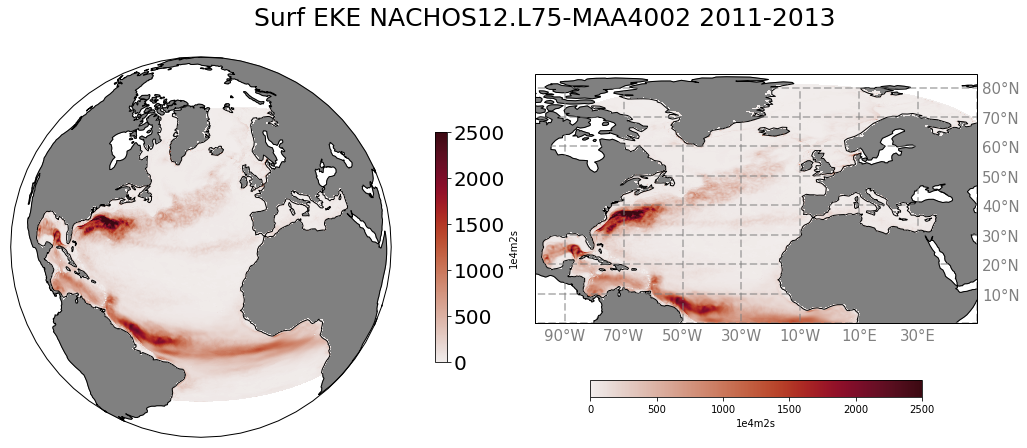

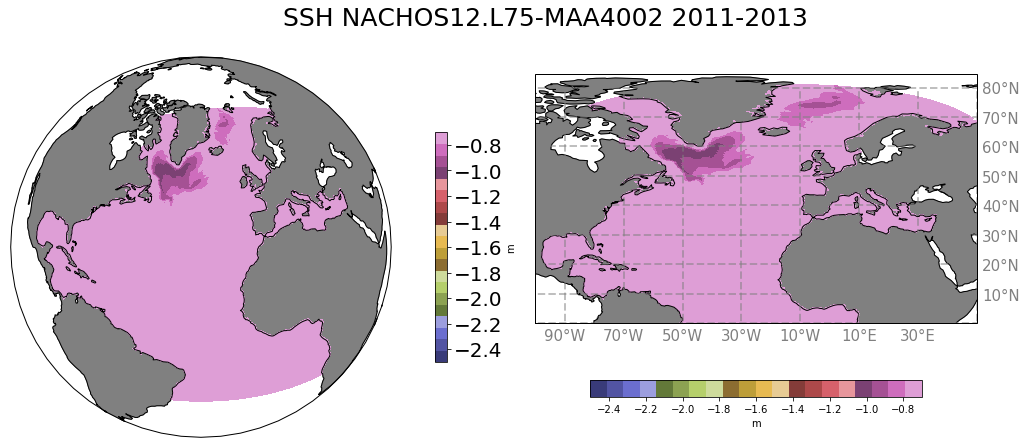

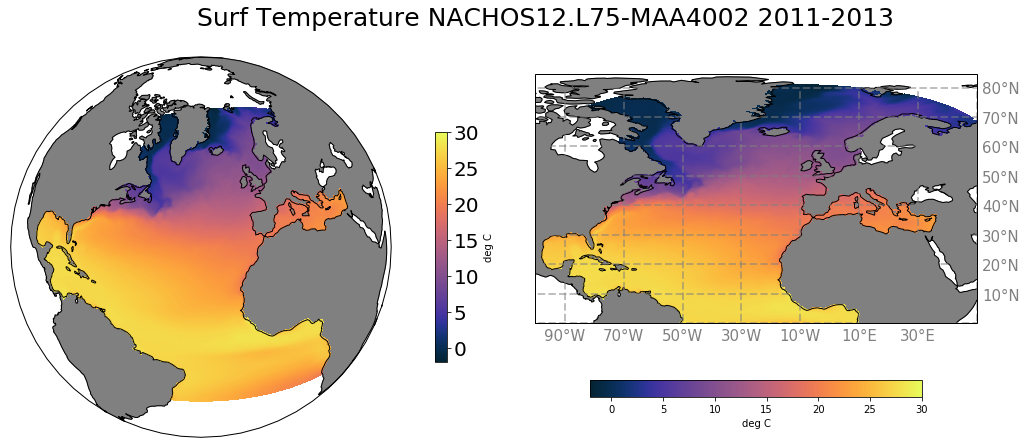

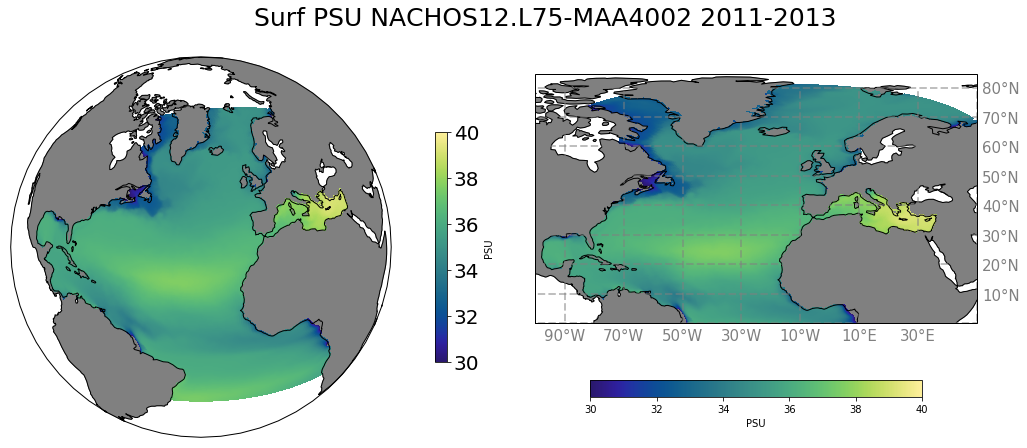

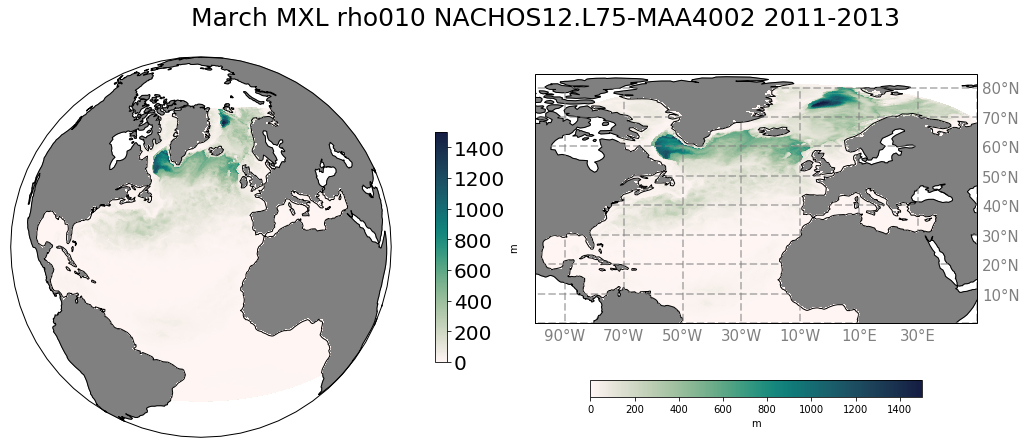

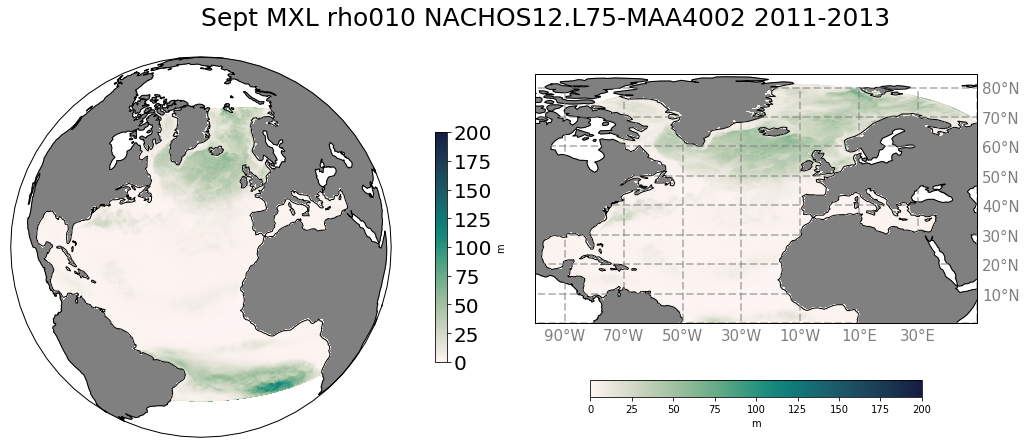

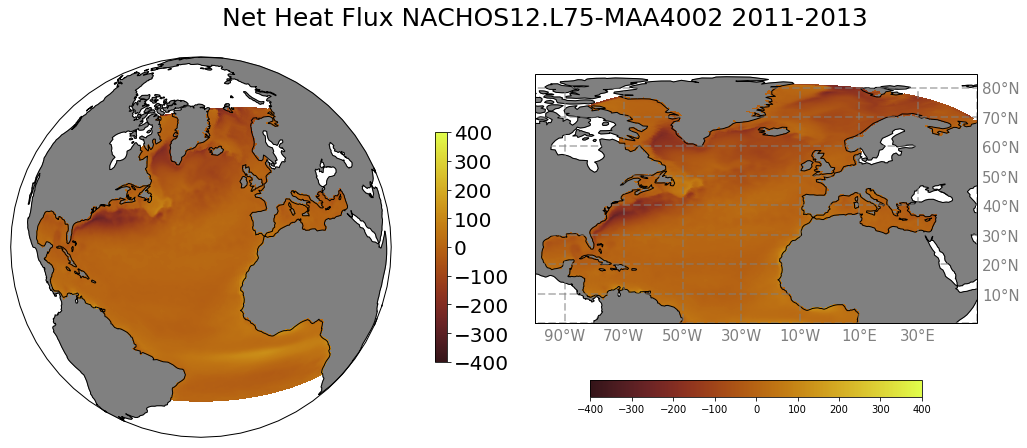

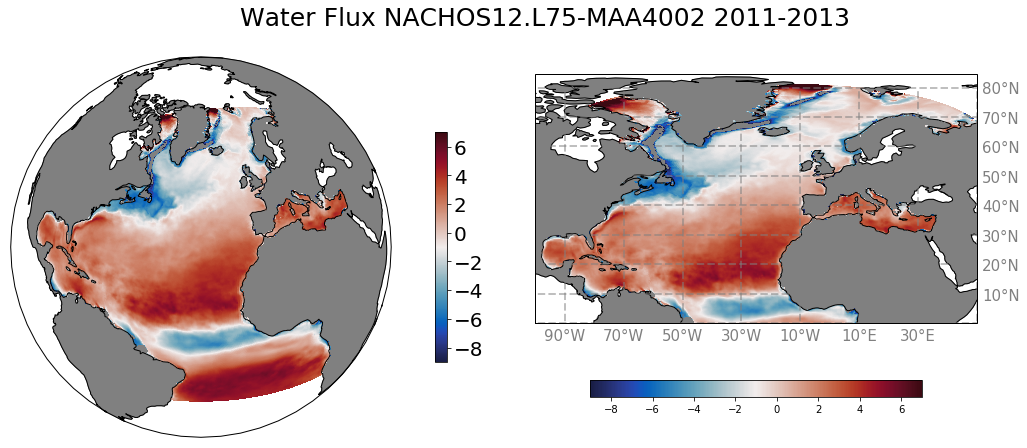

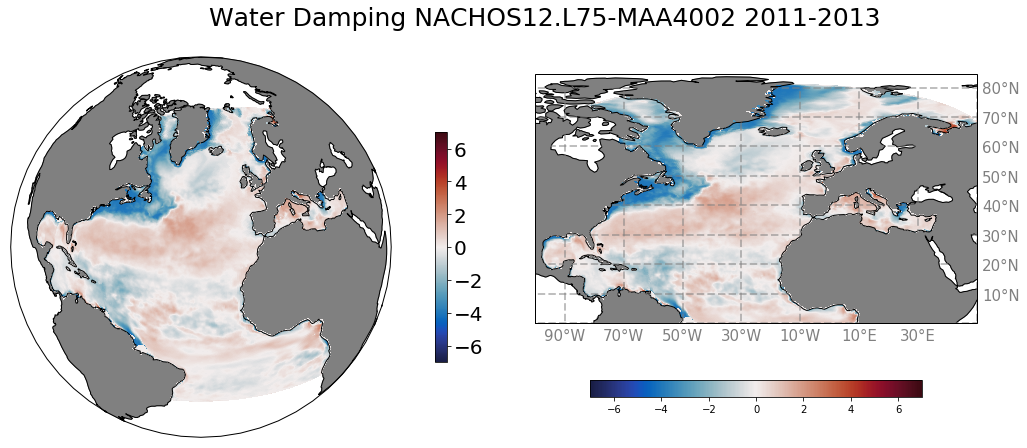

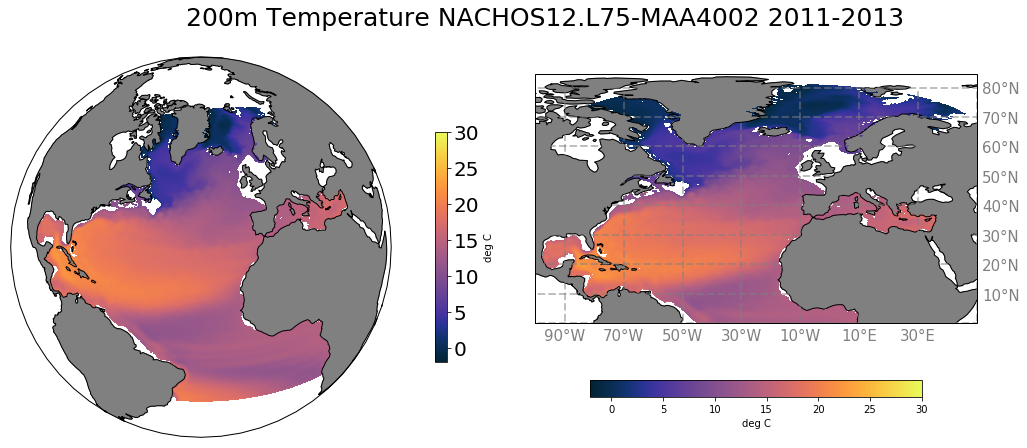

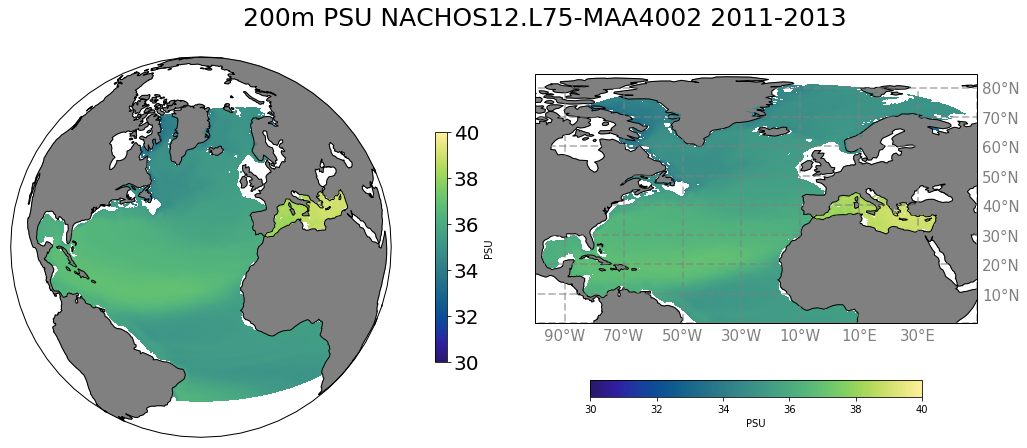

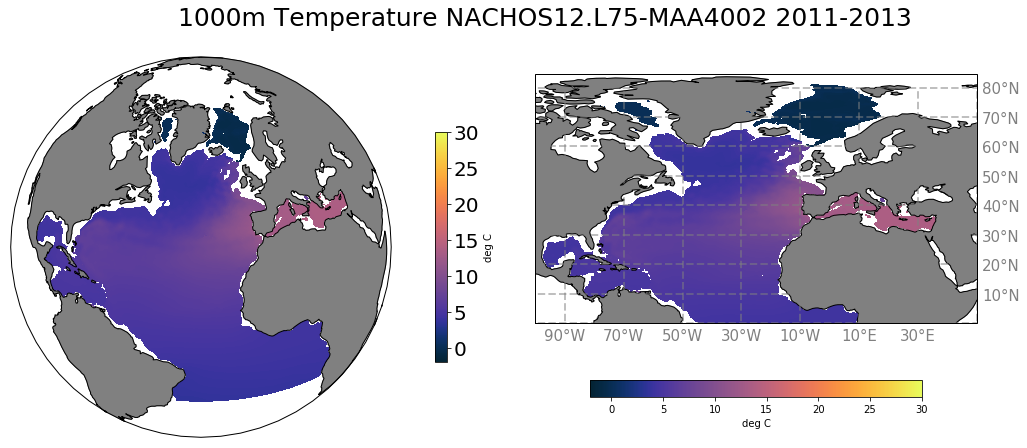

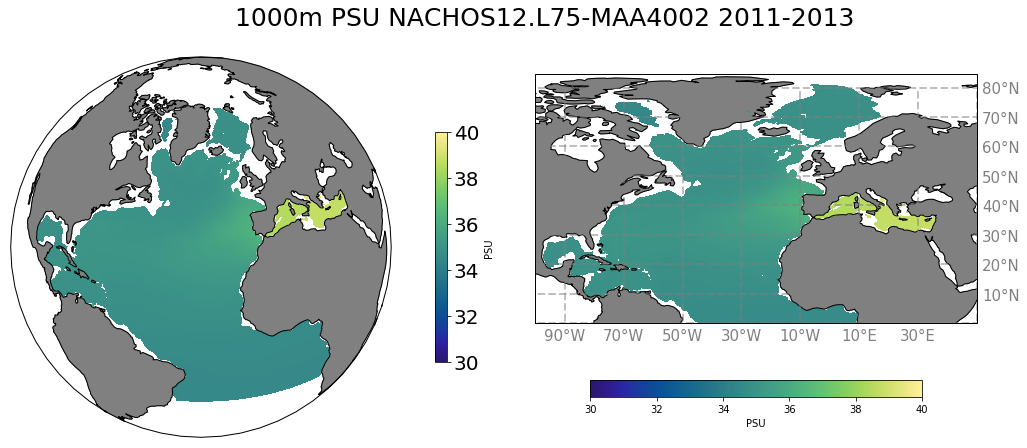

In [20]:
# Tous les plots glob et atl cote à cote
# Eke, SSH,T et S

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,10000*eke_ma,0,2500,'1e4m2s','',cmocean.cm.amp)
plot_atl(fig,122,10000*eke_ma,0,2500,'1e4m2s','',cmocean.cm.amp)
fig.suptitle('Surf EKE NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,ssh_ma,-2.5,-0.7,'m','','tab20b')
plot_atl(fig,122,ssh_ma,-2.5,-0.7,'m','','tab20b')
fig.suptitle('SSH NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,tem_ma[0],-2,30,'deg C','',cmocean.cm.thermal)
plot_atl(fig,122,tem_ma[0],-2,30,'deg C','',cmocean.cm.thermal)
fig.suptitle('Surf Temperature NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,sal_ma[0],30,40,'PSU','',cmocean.cm.haline)
plot_atl(fig,122,sal_ma[0],30,40,'PSU','',cmocean.cm.haline)
fig.suptitle('Surf PSU NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,mxl03_rho010_ma,0,1500,'m','',cmocean.cm.tempo)
plot_atl(fig,122,mxl03_rho010_ma,0,1500,'m','',cmocean.cm.tempo)
fig.suptitle('March MXL rho010 NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,mxl09_rho010_ma,0,200,'m','',cmocean.cm.tempo)
plot_atl(fig,122,mxl09_rho010_ma,0,200,'m','',cmocean.cm.tempo)
fig.suptitle('Sept MXL rho010 NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,Heat_ma,-400,400,'','',cmocean.cm.solar)
plot_atl(fig,122,Heat_ma,-400,400,'','',cmocean.cm.solar)
fig.suptitle('Net Heat Flux NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,86400*WaterFlx_ma,-9,7,'','',cmocean.cm.balance)
plot_atl(fig,122,86400*WaterFlx_ma,-9,7,'','',cmocean.cm.balance)
fig.suptitle('Water Flux NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,86400*WaterDmp_ma,-7,7,'','',cmocean.cm.balance)
plot_atl(fig,122,86400*WaterDmp_ma,-7,7,'','',cmocean.cm.balance)
fig.suptitle('Water Damping NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,tem_ma[30],-2,30,'deg C','',cmocean.cm.thermal)
plot_atl(fig,122,tem_ma[30],-2,30,'deg C','',cmocean.cm.thermal)
fig.suptitle('200m Temperature NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,sal_ma[30],30,40,'PSU','',cmocean.cm.haline)
plot_atl(fig,122,sal_ma[30],30,40,'PSU','',cmocean.cm.haline)
fig.suptitle('200m PSU NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,tem_ma[46],-2,30,'deg C','',cmocean.cm.thermal)
plot_atl(fig,122,tem_ma[46],-2,30,'deg C','',cmocean.cm.thermal)
fig.suptitle('1000m Temperature NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,sal_ma[46],30,40,'PSU','',cmocean.cm.haline)
plot_atl(fig,122,sal_ma[46],30,40,'PSU','',cmocean.cm.haline)
fig.suptitle('1000m PSU NACHOS12.L75-'+case+' '+year, fontsize=25)
